# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries

import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd
sns.set_style("darkgrid") 

%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here

import random 

times=10
column='value'

def roll_10_times(times):
    return random.choices(range(1,7), k=times)

dice_results=pd.DataFrame({column:roll_10_times(times)})
dice_results

,value
0,3
1,5
2,4
3,6
4,4
5,5
6,4
7,2
8,1
9,5


#### 2.- Plot the results sorted by value.

In [3]:
# your code here

sorted_dice_results=dice_results.sort_values(column)
sorted_dice_results

,value
8,1
7,2
0,3
2,4
4,4
6,4
1,5
5,5
9,5
3,6


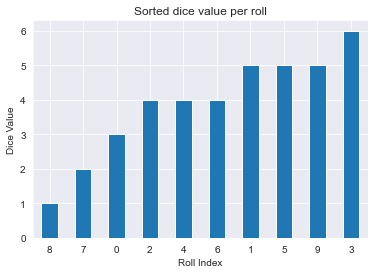

In [4]:
sorted_dice_results[column].plot(kind='bar', legend=None, rot=0)
plt.xlabel('Roll Index')
plt.ylabel('Dice Value')
plt.title('Sorted dice value per roll')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [5]:
# your code here

frequency=sorted_dice_results[column].value_counts(sort=False)
frequency


1    1
2    1
3    1
4    3
5    3
6    1
Name: value, dtype: int64

array([[<AxesSubplot:title={'center':'value'}>]], dtype=object)

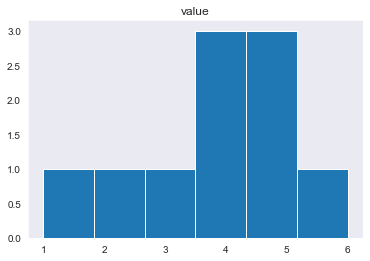

In [6]:
# Frequency distribution plot

dice_results.hist(bins=6, grid=False)


"""
your comments here
"""


The first graph shows which number the dice shows per each time. The second graph shows the frequency of each value of the dice shown  

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here

def mean_by_sum_and_divide(df,column):
    return float(df[column].sum() / len(df[column]))


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here

def mean_calculation_method_two(df, column):
    values_df = df[column].value_counts()
    frequency = values_df.values
    dice_value = values_df.index
    return float(sum(dice_value * frequency) / len(df[column]))


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
# your code here

def median_calculation(df, column):
    df = df.sort_values(column)
    df = df.reset_index(drop=True)
    n_elem = len(df[column])
    index = n_elem // 2
    if not n_elem % 2:
        first_element = df[column][index - 1]
        second_element = df[column][index]
        return float((first_element + second_element) / 2)
    return float(df[column][index])



#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
# your code here

def quartiles_calculation(df, column, method):
    Q2 = median_calculation(df, column)
    Q4 = float(max(df[column]))
    n_elem = len(df[column])
    index = n_elem // 2
    if not n_elem % 2:
        lower_df = df.iloc[0:index]
        upper_df = df.iloc[index:]
    else:
        if method == 1:
            lower_df = df.iloc[0:index]
            upper_df = df.iloc[index+1:]
        elif method == 2:
            lower_df = df.iloc[0:index+1]
            upper_df = df.iloc[index:]
        elif method == 3:
            Q1, Q3 = method_three_odd_data(df, column, n_elem)
            return Q1, Q2, Q3, Q4
    Q1 = median_calculation(lower_df, column)
    Q3 = median_calculation(upper_df, column)
    return Q1, Q2, Q3, Q4

def method_three_odd_data(df, column, n_elem):
    n_case_1 = (n_elem - 1) / 4
    if not n_case_1 % 1:
        n_case_1 = int(n_case_1)
        Q1 = (0.25 * df.iloc[n_case_1-1] + 0.75 * df.iloc[n_case_1])[column]
        Q3 = (0.25 * df.iloc[3*n_case_1+1] + 0.75 * df.iloc[3*n_case_1])[column]
    else:
        n_case_2 = int((n_elem - 3) / 4)
        Q1 = (0.25 * df.iloc[n_case_2+1] + 0.75 * df.iloc[n_case_2])[column]
        Q3 = (0.25 * df.iloc[3*n_case_2+1] + 0.75 * df.iloc[3*n_case_2+2])[column]
    return Q1, Q3

In [11]:
results = {}
our_methods = ['method 1', 'method 2', 'method 3']
pandas_methods = ['nearest', 'midpoint']

for index, method in enumerate(our_methods):
    results[method] = quartiles_calculation(sorted_dice_results, column, index + 1)

for method in pandas_methods:
    results[method] = sorted_dice_results.quantile([0.25, 0.5, 0.75, 1], interpolation=method)[column].astype('float')

results_df = pd.DataFrame(results)
results_df.index = ['Q1', 'Q2', 'Q3', 'Q4']
results_df

,method 1,method 2,method 3,nearest,midpoint
Q1,3.0,3.0,3.0,3.0,3.5
Q2,4.0,4.0,4.0,4.0,4.0
Q3,5.0,5.0,5.0,5.0,5.0
Q4,6.0,6.0,6.0,6.0,6.0


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from [here](https://drive.google.com/file/d/1mDz-pl6Dpp0fvrXqkFTosuaW3mw6tfWP/view?usp=sharing), place it in the `data` folder and load it
#### 1.- Sort the values and plot them. What do you see?

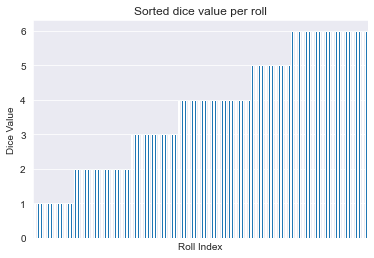

In [12]:
# your code here

roll_the_dice_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv', usecols=[1,2], index_col=0)

# Sort the values
sorted_roll_the_dice_hundred = roll_the_dice_hundred.sort_values(column)

# Plot the sorted values
sorted_roll_the_dice_hundred[column].plot(kind='bar', legend=None, rot=0)
plt.xticks([])
plt.xlabel('Roll Index')
plt.ylabel('Dice Value')
plt.title('Sorted dice value per roll')
plt.show()

In [13]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [14]:
# your code here

#FK : Having a challenge with this question 

#### 3.- Now, calculate the frequency distribution.


In [15]:
# your code here


#FK : Having a challenge with this question 

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [16]:
# your code here


#FK : Having a challenge with this question 

In [17]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5 Read the `roll_the_dice_thousand.csv` from <br> 
[here](https://drive.google.com/file/d/1zYzEcKL1tA69WCACG8WhTEr7m9fojClZ/view?usp=sharing), place it in the `data` folder and load it. 
Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [18]:
# your code here


#FK : Having a challenge with this question 

In [19]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`

from [here](https://drive.google.com/file/d/1sHr5-fnvn9oBvxu3tlR4ANCnQHDV-bUc/view?usp=sharing), place it in the data folder and load it. <br>
Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [20]:
# your code here

ages_population=pd.read_csv('../data/ages_population.csv')
ages_population.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


In [21]:
ages_population.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [22]:
column = 'observation'
frequency = ages_population[column].value_counts()
frequency

39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
        ..
70.0     1
71.0     1
7.0      1
69.0     1
73.0     1
Name: observation, Length: 72, dtype: int64

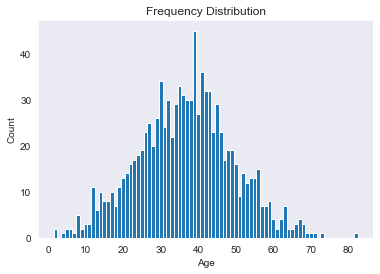

In [23]:
max_range = int(ages_population[column].max()) + 1
min_range = int(ages_population[column].min())
bins = [n + 0.5 for n in range(min_range, max_range)]
ages_population[column].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Frequency Distribution')
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [24]:
# your code here
ages_population[column].describe()

count    1000.0000
mean       36.5600
std        12.8165
min         1.0000
25%        28.0000
50%        37.0000
75%        45.0000
max        82.0000
Name: observation, dtype: float64

In [25]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` 
from [here](https://drive.google.com/file/d/1RWGflLnwLOgZICUnrc9COzj3qcUeJP0X/view?usp=sharing) place it in the data folder and load it.  Calculate the frequency distribution and plot it.

In [26]:
# your code here

ages_pop_2=pd.read_csv('../data/ages_population2.csv')
ages_pop_2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


In [27]:
column = 'observation'
frequency = ages_pop_2[column].value_counts()
frequency

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
35.0      3
19.0      3
36.0      2
Name: observation, dtype: int64

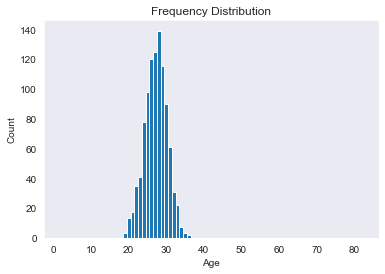

In [28]:
ages_pop_2[column].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Frequency Distribution')
plt.show()


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [29]:
ages_pop_2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


"""
your comments here
"""

Mean of the age is much younger. 

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [30]:
# your code here

ages_pop_2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [31]:
import statistics
statistics.stdev(ages_pop_2['observation'])

2.9698139326891835

"""
your comments here
"""

As observed, the mean of the population 2 is alot younger (27 yrs.old) wheras in the first graph, the mean stays as 36 yrs.old. 
In the previous graph, the standard deviation is 12 whereas in this graph, the standard deviation is 2. It means the age range in this graph is narrower and therefore are not far from the mean of 27yrs old. 

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv` 
from [here](https://drive.google.com/file/d/1knUGLeVUADYUXYqq_Ap48oTtLKkjHCNv/view?usp=sharing) and place it in the data folder. Calculate the frequency distribution and plot it.

In [32]:
# your code here
ages_pop_3 = pd.read_csv('../data/ages_population3.csv')

In [33]:
ages_pop_3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


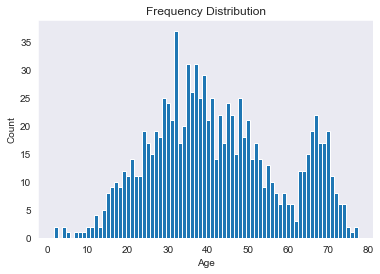

In [43]:
max_range = int(ages_pop_3[column].max()) + 1
min_range = int(ages_pop_3[column].min())
bins = [n + 0.5 for n in range(min_range, max_range)]
ages_pop_3[column].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Frequency Distribution')
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [34]:
# your code here

ages_pop_3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


"""
your comments here
"""

The mean of the age group is older. It's 41.9 compared to 27 and 36 we've seen from the first two graphs. The standard deviation is 16, meaning there are wider age range in this sample. 


#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [45]:
# your code here
ages_pop_3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [36]:
"""
your comments here
"""


#FK : Having a challenge with this question 

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [37]:
# your code here


#FK : Having a challenge with this question 

In [38]:
"""
your comments here
"""


#FK : Having a challenge with this question 

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [39]:
# your code here

In [40]:
"""
your comments here
"""

'\nyour comments here\n'